In [6]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [8]:
data_dir = r"C:\Users\Kaushik\Untitled Folder"

In [9]:
import os
def get_doc_id(data_dir):
    if not os.path.exists(data_dir):
        raise OSError(f"Directory {data_dir} does not exist.")
    doc_id = []
    for doc in os.listdir(data_dir):
        doc_id = doc.split(".")[0]
        if doc_id not in doc_id:
            doc_id.append(doc_id)
    doc_id = [doc_id for doc_id in doc_id if doc_id != '']
    if not doc_id:
        raise ValueError(f"No files with expected naming convention found in {data_dir}.")
    
    return doc_id

In [10]:
doc_ids = get_doc_id(data_dir)
print(f"Number of documents is {len(doc_ids)}")
print(doc_ids)

Number of documents is 200
['15939911', '16778410', '17803823', '18236639', '18258107', '18416479', '18561524', '18666334', '18787726', '18815636', '19009665', '19214295', '19307547', '19610147', '19816630', '19860006', '19860007', '19860925', '20146086', '20671919', '20977862', '21067996', '21129213', '21254744', '21308977', '21477357', '21505579', '21527041', '21672201', '21720478', '21923918', '22218279', '22514576', '22515939', '22520024', '22665582', '22719160', '22781096', '22791498', '22814979', '23033875', '23035161', '23076693', '23077697', '23124805', '23155491', '23242090', '23312850', '23468586', '23678274', '23864579', '23897372', '24043987', '24161539', '24294397', '24518095', '24526194', '24654246', '24781756', '24898994', '24957905', '25023062', '25024632', '25139918', '25155594', '25210224', '25246819', '25293719', '25295501', '25370695', '25410034', '25410883', '25572898', '25661749', '25721834', '25743872', '25759562', '25793030', '25853982', '25858931', '25884600', 

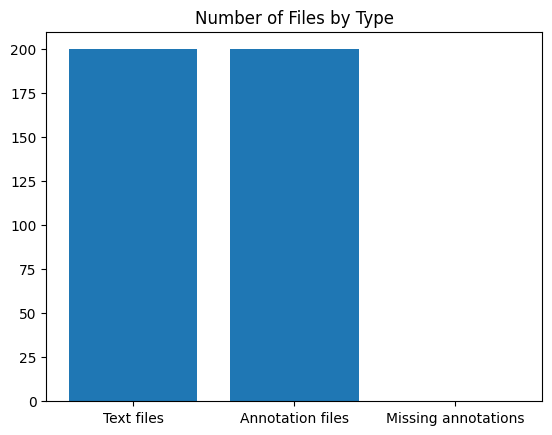

In [11]:
import matplotlib.pyplot as plt
text_files = [f for f in os.listdir(data_dir) if f.endswith('.txt')]
ann_files = [f for f in os.listdir(data_dir) if f.endswith('.ann')]
text_ids = [f.split('.')[0] for f in text_files]
annotated_ids = [f.split('.')[0] for f in ann_files]

# count number of files without annotations
missing_annotations = 0
for text_id in text_ids:
    if text_id not in annotated_ids:
        missing_annotations += 1

# create bar chart
labels = ['Text files', 'Annotation files', 'Missing annotations']
counts = [len(text_files), len(ann_files), missing_annotations]

plt.bar(labels, counts)
plt.title('Number of Files by Type')
plt.show()


In [12]:
import os

def load_txt_data(txt_dir, doc_ids):
    
    if not os.path.exists(txt_dir):
        raise OSError(f"Directory {txt_dir} does not exist.")

    data = {}
    
    for file_id in doc_ids:
        
        file_name = file_id + ".txt"
        with open(os.path.join(txt_dir, file_name), "r",encoding='utf-8') as f:
            text = f.read()
            
        data[file_id] = {
                "text": text, 
                "annotations": []
        }        
    if not data:
        raise ValueError(f"No .txt files found in {txt_dir}.")

    return data

In [13]:
data = load_txt_data(data_dir, doc_ids)

print("data: {")
for doc_id in list(data.keys())[:3]:
    print(f"\t'{doc_id}': {{")
    text = data[doc_id]['text']
    annotations = data[doc_id]['annotations']
    print(f"\t\ttext:\t{text[:78]} .....")
    print(f"\t\tannotations: {annotations}")
    print("\t},")
print('\t....')
print("}")

data: {
	'15939911': {
		text:	CASE: A 28-year-old previously healthy man presented with a 6-week history of  .....
		annotations: []
	},
	'16778410': {
		text:	The patient was a 34-yr-old man who presented with complaints of fever and a c .....
		annotations: []
	},
	'17803823': {
		text:	A 23 year old white male with a 4 year history of Crohn's disease presented wi .....
		annotations: []
	},
	....
}


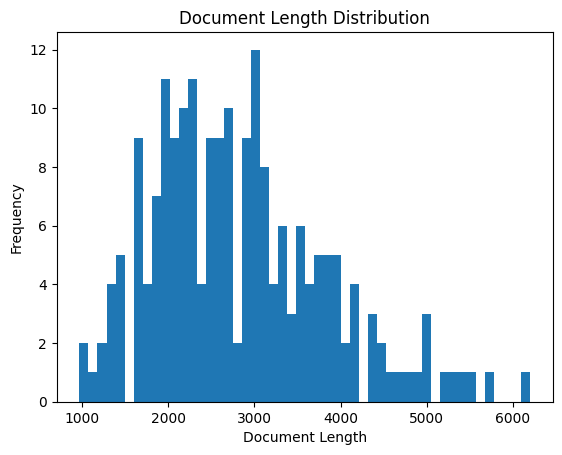

In [14]:

def get_doc_length_distribution(data):
  
    
    doc_lengths = []
    for doc_id in data:
        
            text = data[doc_id]['text']
            
            doc_length = len(text)
            doc_lengths.append(doc_length)
    
    return doc_lengths


doc_lengths = get_doc_length_distribution(data)

# plot the document length distribution
plt.hist(doc_lengths, bins=50)
plt.xlabel("Document Length")
plt.ylabel("Frequency")
plt.title("Document Length Distribution")
plt.show()


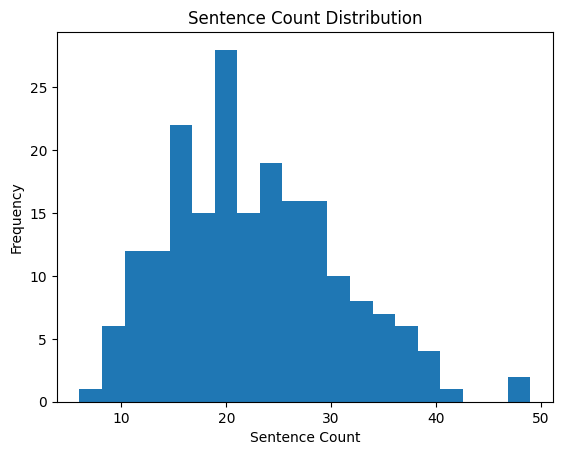

In [15]:
import nltk
def get_doc_sentence_counts(data):
    """
    Computes the number of sentences in each document.

    Return:
        A list of sentence counts for each document.
    """    
    sentence_counts = []
    for doc_id in data:
        text = data[doc_id]['text']
        sentences = nltk.sent_tokenize(text)
        sentence_count = len(sentences)
        sentence_counts.append(sentence_count)
    
    return sentence_counts

# get the sentence counts
sentence_counts = get_doc_sentence_counts(data)

# plot the sentence count distribution
plt.hist(sentence_counts, bins=20)
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.title("Sentence Count Distribution")
plt.show()

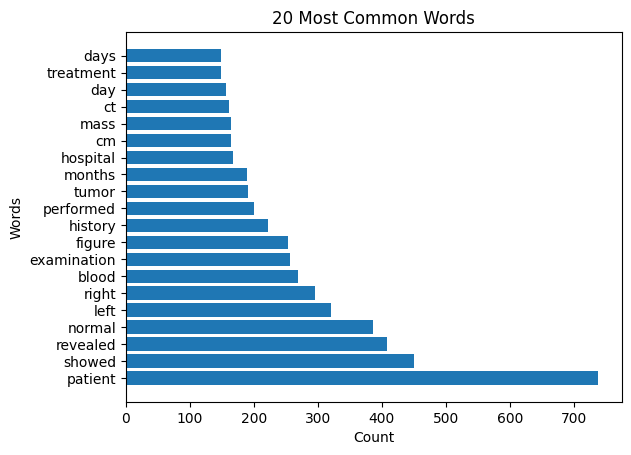

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import collections


stop_words = set(stopwords.words('english'))

all_words = []
for doc_id in data:
    text = data[doc_id]['text']
    words = nltk.word_tokenize(text)
    words = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
    all_words.extend(words)
    
# Get the word frequency distribution
word_freq = Counter(all_words)
# Remove stop words
for stop_word in stop_words:
    del word_freq[stop_word]


# Get the 20 most common words
most_common = word_freq.most_common(20)

# Create a horizontal bar chart
words = [word[0] for word in most_common]
counts = [word[1] for word in most_common]
plt.barh(words, counts)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Words")
plt.title("20 Most Common Words")

plt.show()

In [20]:
sample_ann_file = doc_id + ".ann"
lines = []
with open(os.path.join(data_dir, sample_ann_file)) as f:
    for line in f.readlines():
        lines.append(line)
print("")
for line in lines[:6]:
    print(line.strip())



T1	Age 2 24	4 and a half years old
T2	Sex 25 29	male
T3	Clinical_event 36 45	presented
E1	Clinical_event:T3
T4	Nonbiological_location 53 61	hospital
R1	MODIFY Arg1:T4 Arg2:E1


In [21]:
tags = []

for doc_id in doc_ids:
    ann_file = doc_id + ".ann"
    with open(os.path.join(data_dir, ann_file),encoding='utf-8') as f:
        for line in f.readlines():
            tags.append(line.split("\t")[0][0])
                
set(tags)


{'#', '*', 'A', 'E', 'R', 'T'}

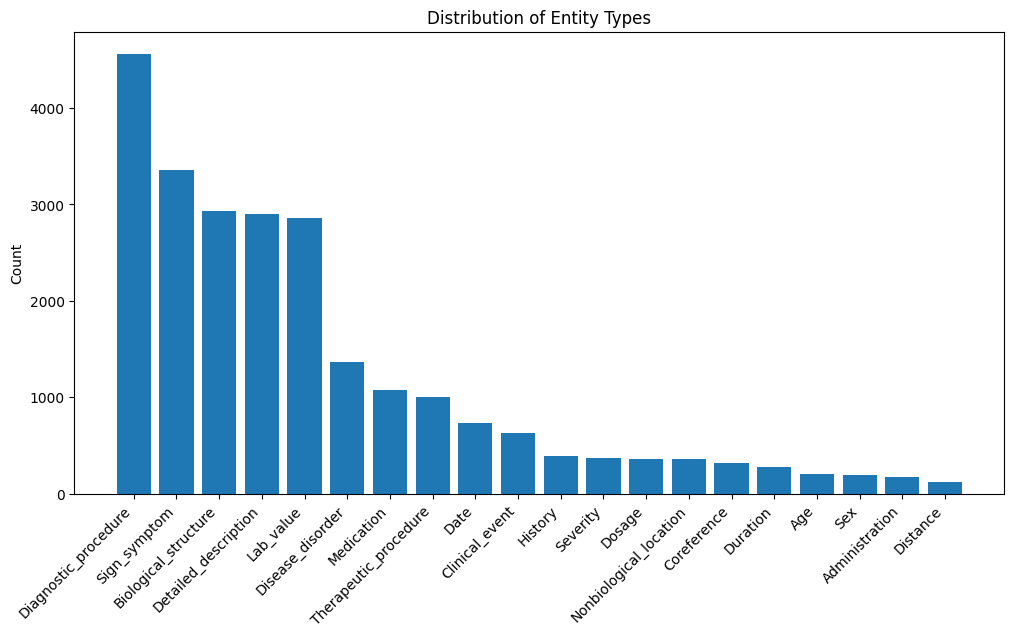

In [23]:
entity_type_counts = {}
for doc_id in doc_ids:
    ann_file = doc_id + ".ann"
    with open(os.path.join(data_dir, ann_file),encoding='utf-8') as f:
        for line in f:
            if line.startswith("T"):
                entity_type = line.split()[1]
                entity_type_counts[entity_type] = entity_type_counts.get(entity_type, 0) + 1

entity_types = list(entity_type_counts.keys())
counts = list(entity_type_counts.values())

# sort by count in descending order
entity_types_sorted = [x for _, x in sorted(zip(counts, entity_types), reverse=True)]
counts_sorted = sorted(counts, reverse=True)

# only keep top 20 entities for visualization
entity_types_top = entity_types_sorted[:20]
counts_top = counts_sorted[:20]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(entity_types_top, counts_top)
ax.set_xticks(range(len(entity_types_top)))
ax.set_xticklabels(entity_types_top, rotation=45, ha="right")
ax.set_ylabel("Count")
ax.set_title("Distribution of Entity Types")
plt.show()

In [25]:
def load_ann_data(ann_dir, doc_ids, data, hyphen_split=True):
    
    for doc_id in doc_ids:

        file_name = doc_id + ".ann"
        
        with open(os.path.join(ann_dir, file_name), "r",encoding='utf-8') as f:

            annotations = []

            for line in f:
                if line.startswith("T"):
                    fields = line.strip().split("\t")
                    if len(fields[1].split(" ")) > 1:
                        label = fields[1].split(" ")[0]

                        # Extracting start end indices (Few annotations contain more than one disjoint ranges)
                        start_end_range = [
                            list(map(int, start_end.split()))
                            for start_end in ' '.join(fields[1].split(" ")[1:]).split(';')
                        ]

                        start_end_range_fixed = []
                        for start, end in start_end_range:
                            tokens, start_end_split_list = splitting_tokens(doc_id, start, end,
                                                                                  hyphen_split)
                            start_end_range_fixed.extend(start_end_split_list)

                        # Adding labels, start, end to annotations
                        for start, end in start_end_range_fixed:
                            annotations.append({
                                "label": label,
                                "start": start,
                                "end": end
                            })
            # sort annotations based on 'start' key before adding it to our dataset
            annotations = sorted(annotations, key=lambda x: (x['start'], x['label']))
            data[doc_id]["annotations"] = annotations
                
    return data

In [26]:
data = load_ann_data(data_dir, doc_ids, data)

In [27]:
for doc_id in list(data.keys())[:3]:
    text = data[doc_id]['text']
    annotations = data[doc_id]['annotations']
    print(f"text:\n{text[:40]} .....")
    print(f"annotations:\n{annotations[:2]} .....")

text:
CASE: A 28-year-old previously healthy m .....
annotations:
[{'label': 'Age', 'start': 8, 'end': 10}, {'label': 'Age', 'start': 11, 'end': 15}] .....
text:
The patient was a 34-yr-old man who pres .....
annotations:
[{'label': 'Age', 'start': 18, 'end': 20}, {'label': 'Age', 'start': 21, 'end': 23}] .....
text:
A 23 year old white male with a 4 year h .....
annotations:
[{'label': 'Age', 'start': 2, 'end': 4}, {'label': 'Age', 'start': 5, 'end': 9}] .....


In [28]:
entities = set()
for doc_id, doc in data.items():
    for ann in doc['annotations']:
        entities.add(ann['label'])
entities

{'Activity',
 'Administration',
 'Age',
 'Area',
 'Biological_attribute',
 'Biological_structure',
 'Clinical_event',
 'Color',
 'Coreference',
 'Date',
 'Detailed_description',
 'Diagnostic_procedure',
 'Disease_disorder',
 'Distance',
 'Dosage',
 'Duration',
 'Family_history',
 'Frequency',
 'Height',
 'History',
 'Lab_value',
 'Mass',
 'Medication',
 'Nonbiological_location',
 'Occupation',
 'Other_entity',
 'Other_event',
 'Outcome',
 'Personal_background',
 'Qualitative_concept',
 'Quantitative_concept',
 'Severity',
 'Sex',
 'Shape',
 'Sign_symptom',
 'Subject',
 'Texture',
 'Therapeutic_procedure',
 'Time',
 'Volume',
 'Weight'}

In [29]:
colors = {"Activity": "#123456", "Administration": "#789abc", "Age": "#def123", "Area": "#456789", "Biological_attribute": "#abc456", "Biological_structure": "#123def", "Clinical_event": "#456abc", "Color": "#789def", "Coreference": "#abc123", "Date": "#def789",
          "Detailed_description": "#234567", "Diagnostic_procedure": "#890abc", "Disease_disorder": "#567890", "Distance": "#abc234", "Dosage": "#234def", "Duration": "#890456", "Family_history": "#567def", "Frequency": "#234789", "Height": "#890def", "History": "#567123",
          "Lab_value": "#890123", "Mass": "#567234", "Medication": "#123456", "Nonbiological_location": "#789abc", "Occupation": "#def123", "Other_entity": "#abc456", "Other_event": "#123def", "Outcome": "#456abc", "Personal_background": "#789def", "Qualitative_concept": "#abc123",
          "Quantitative_concept": "#def789", "Severity": "#234567", "Sex": "#890abc", "Shape": "#567890", "Sign_symptom": "#abc234", "Subject": "#234def", "Texture": "#890456", "Therapeutic_procedure": "#567def", "Time": "#234789", "Volume": "#890def", "Weight": "#567123"}


In [30]:
# Define the function to get token counts
def get_token_counts(data, remove_stop_words=True):
    token_counts = Counter()
    stop_words = set(stopwords.words('english'))
    for file_id, file_data in data.items():
        text = file_data['text']
        annotations = file_data['annotations']
        for annotation in annotations:
            label = annotation['label']
            start = annotation['start']
            end = annotation['end']
            annotated_text = text[start:end]
            annotated_tokens = annotated_text.split()
            if remove_stop_words:
                annotated_tokens = [token for token in annotated_tokens if token.lower() not in stop_words]
            token_counts.update(annotated_tokens)
    return token_counts

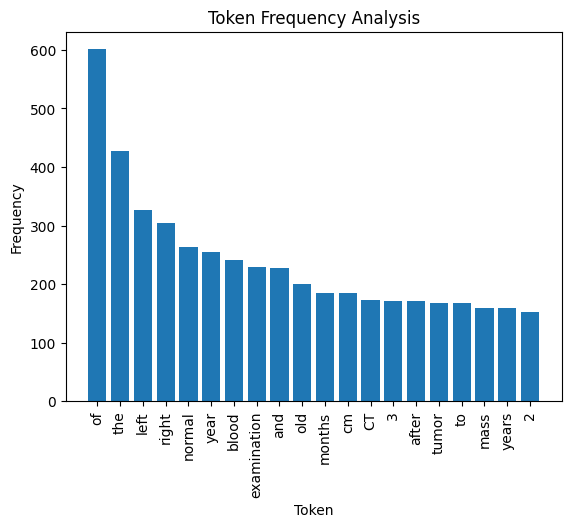

In [31]:
token_counts = get_token_counts(data, remove_stop_words=False)

# Sort the tokens by frequency
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 most common tokens and their counts
top_tokens = [t[0] for t in sorted_tokens[:20]]
top_counts = [t[1] for t in sorted_tokens[:20]]

# Create the bar plot
plt.bar(top_tokens, top_counts)
plt.xticks(rotation=90)
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Token Frequency Analysis')
plt.show()

In [36]:
def create_json(preprocessed_data_dir, data):

    if os.path.exists(preprocessed_data_dir):
        # Delete the contents of the directory
        shutil.rmtree(preprocessed_data_dir)
    # Recreate the directory
    os.makedirs(preprocessed_data_dir)
    
    # Write the dictionary to a JSON file
    with open(os.path.join(preprocessed_data_dir, "annotated_data.json"), "w") as f:
        json.dump(data, f)

In [37]:
preprocessed_data_dir = r"E:\project\annotated_dictionary"
create_json(preprocessed_data_dir, data)